In [1]:
"""📦 Install TensorFlow and import libraries"""
!pip install -q tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
""" Generate synthetic 3D CT scan data (10 volumes per class)"""
def generate_3d_volume(label):
    volume = np.random.rand(64, 64, 64)
    if label == 1:
        volume = volume + np.random.normal(loc=0.5, scale=0.25, size=volume.shape)
    volume = np.clip(volume, 0, 1)
    return volume, label

x, y = [], []
for label in [0, 1]:
    for _ in range(10):
        vol, lab = generate_3d_volume(label)
        x.append(vol)
        y.append(lab)

x = np.array(x)[..., np.newaxis]  # shape → (20, 64, 64, 64, 1)
y = np.array(y)

print(x.shape, y.shape)


(20, 64, 64, 64, 1) (20,)


In [3]:
"""📦 Create tf.data.Dataset from synthetic 3D volumes"""
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=20).batch(4).prefetch(tf.data.AUTOTUNE)

# Split into train and test
train_ds = dataset.take(3)
test_ds = dataset.skip(3)


In [4]:
"""🧠 Define a simple 3D ConvNet model"""
model = keras.Sequential([
    layers.Conv3D(32, 3, activation='relu', input_shape=(64, 64, 64, 1)),
    layers.MaxPooling3D(2),
    layers.Conv3D(64, 3, activation='relu'),
    layers.MaxPooling3D(2),
    layers.Conv3D(128, 3, activation='relu'),
    layers.GlobalAveragePooling3D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 62, 62, 62, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 31, 31, 31, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 29, 29, 29, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 14, 14, 14, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 12, 12, 12,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,889 (1.09 MB)

 Trainable params: 285,889 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
"""🚀 Train the 3D ConvNet"""
history = model.fit(train_ds, validation_data=test_ds, epochs=10)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.6875 - loss: 0.6046 - val_accuracy: 0.3750 - val_loss: 1.2823
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.4896 - loss: 0.8994 - val_accuracy: 0.5000 - val_loss: 0.6622
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5625 - loss: 0.6106 - val_accuracy: 0.8750 - val_loss: 0.5091
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.7917 - loss: 0.6243 - val_accuracy: 1.0000 - val_loss: 0.5746
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.5000 - loss: 0.5514 - val_accuracy: 0.3750 - val_loss: 0.5280
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.7083 - loss: 0.3819 - val_accuracy: 1.0000 - val_loss: 0.3662
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 1.0000 - loss: 0.3686 - val_accuracy: 1.0000 - val_loss: 0.2670
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 6s/step - accuracy: 1.0000 - loss: 0.4698 - val_accuracy: 1.0000 - val_loss: 0.3519
Epoch 9/

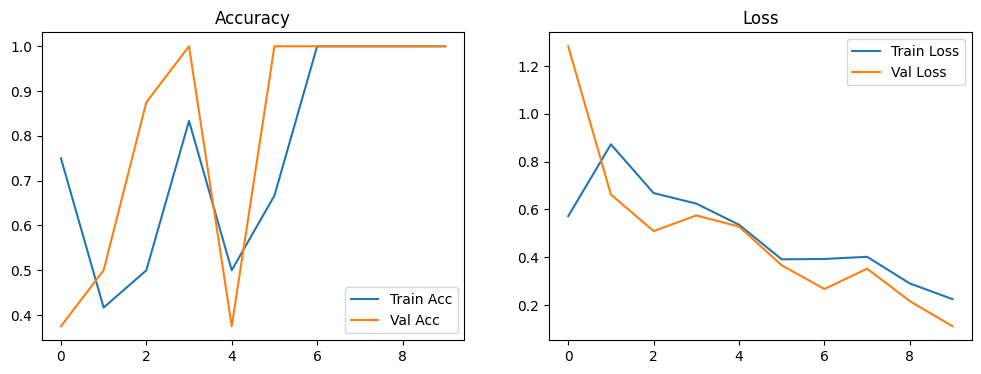

In [6]:
""" Plot training history"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss")
plt.legend()
plt.show()
